In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb

#### Question 1: 
*Generate 1000 uniform random numbers between [0,1] using the python module random or numpy.random .Plot these random numbers with histograms with even bin size 0.2.*
 

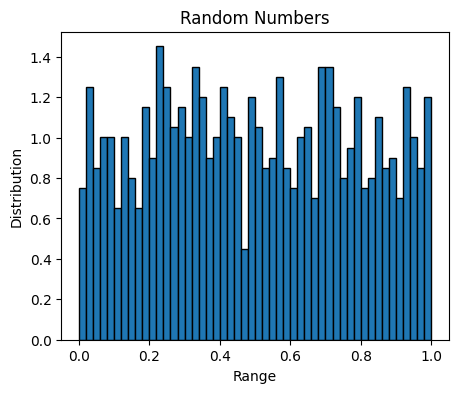

In [2]:
N = 1000
X = np.linspace(1,1000,N)
Dist = np.zeros(N)

for i in range(N):
    Dist[i] = np.random.random()


plt.figure(figsize=(5,4))
bins = 50
plt.xlabel("Range")
plt.ylabel("Distribution")
plt.title("Random Numbers")
plt.hist(Dist, bins, density=True, edgecolor = 'black')
plt.show()

#### Question 2: 
*Generate 1000 uniform random integers between [1, 1000] using the python module random or numpy.random . Plot these random numbers with histograms with even bin size 0.2.*
 

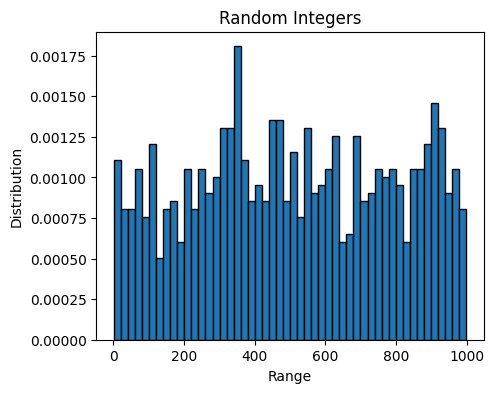

In [3]:
N = 1000
X = np.linspace(1,1000,N)
Dist = np.zeros(N)

for i in range(N):
    Dist[i] = np.random.randint(1,1000)


plt.figure(figsize=(5,4))
bins = 50
plt.xlabel("Range")
plt.ylabel("Distribution")
plt.title("Random Integers")
plt.hist(Dist, bins, density=True, edgecolor='black')
plt.show()

#### Question 3: 
*Generate 1000 uniform random integers. Get the mean and median of these numbers*
 

In [4]:
N = 1000
lower_limit, upper_limit = 1, 100
Dist = np.zeros(N)

for i in range(N):
    Dist[i] = np.random.randint(1,100)


def Mean_Median(X: list) ->list:
    Mean = np.sum(X)/len(X)
    
    Sorted_X = np.sort(X)
    if len(X)%2 != 1:
        Median = Sorted_X[(len(X)//2)-1]
    else:
        Median = Sorted_X[(len(X)/2)]    

    return [Mean, Median]

mean, median = Mean_Median(Dist)
print("The Mean of the Integers is: ",mean)
print("The Median of the Integers is: ",median)


The Mean of the Integers is:  51.426
The Median of the Integers is:  52.0


#### Question 4.
*Generate N uniform random numbers $X = \left[x_0, x_1, ...., x_N−1 \right]$ between [a, b]. Write a program to obtain the distribution of X with 
$Bins =\left[ min(X), min(X) + dx, min(x) + 2x, ...., max(X)\right]$. Choose N = 5000, a = −1.3, b = 1.3 and dx = 0.05*

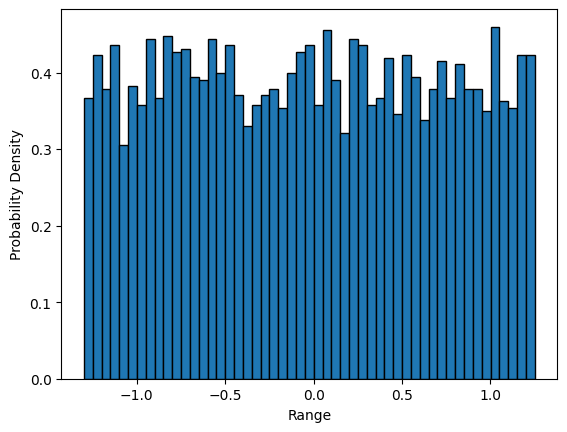

In [5]:
N = 5000
a, b, dx = -1.3, 1.3, 0.05
Dist = np.zeros(N)

for i in range(N):
    Dist[i] = np.random.uniform(a,b)

bins = [min(Dist)] 

i = 1   
while True:
    while bins[i-1]+dx <= max(Dist):
        bins.append(bins[i-1]+dx)
        i+=1
    else:
        break

plt.xlabel("Range")
plt.ylabel("Probability Density")        
plt.hist(Dist, bins, density= True, edgecolor='black')
plt.show()    


#### Question 5.
*Perform a numerical experiment of coin toss to show that, for very large number of trials, the probability of obtaining head is $\frac{1}{2}$.*

In [6]:
#Number of trials
Trials = 10e6
#array to store head
Heads = []

for i in range(int(Trials)):
    if np.random.random()<0.5:
        Heads.append([1])

print("The Probability of getting Head from an unbiased coin is: {:0.2f}% which is approximately 50%.".format((len(Heads)/Trials)*100))

The Probability of getting Head from an unbiased coin is: 50.02% which is approximately 50%.


#### Question 7.
In a box there is 5 red and 7 white balls.
* One ball is taken out of the box randomly. Get the probability of obtaining the ball as red, with
simulation.
* two balls are taken randomly. Obtain the probability of obtaining \
i. both the ball as red, with simulation.\
ii. one ball red and another ball white, with simulation.

In [7]:
# Define the box
box = ['red']*5 + ['white']*7
# Define the number of simulations
num_simulations = 10e5

#1.
# Initialize a counter for the number of times a red ball is drawn
red_count = 0

# Run the simulations
for _ in range(int(num_simulations)):
    ball = np.random.choice(box)
    if ball == 'red':
        red_count += 1

# Calculate the probability
probability = (red_count / num_simulations)*100

print("The simulated probability of drawing a red ball is {:0.2f}%.".format(probability))

The simulated probability of drawing a red ball is 41.72%.


In [8]:
# Define the box
box = ['red']*5 + ['white']*7
# Define the number of simulations
num_simulations = 10e4

red_balls = 0
white_balls = 0
composite_balls = 0

for _ in range(int(num_simulations)):
    sample = box.copy()
    ball_1 = np.random.choice(sample)
    if ball_1 == 'red':
        sample.remove('red')
        ball_2 = np.random.choice(sample)
        if ball_2 == 'red':
            red_balls +=1
    else:
        sample.remove('white')
        ball_2 = np.random.choice(sample)
        if ball_2 == 'red':
            composite_balls +=1
        else:
            white_balls +=1    

print("Probability of both balls being red is: {:0.2f}%".format((red_balls/num_simulations)*100))
print("Probability of both balls being white is: {:0.2f}%".format((white_balls/num_simulations)*100))  
print("Probability of one ball being red and another being white is: {:0.2f}%".format((composite_balls/num_simulations)*100))                         

Probability of both balls being red is: 15.14%
Probability of both balls being white is: 31.75%
Probability of one ball being red and another being white is: 26.38%


#### Question 8.

Binomial Distribution\
Simulate a coin toss experiment N times. Obtain the probabilities of obtaining head in n=1,2,...,N trial. Plot the probabilites respect to n. Compare the results with $${N \choose n} \left(\frac{1}{2}\right)^n \left(\frac{1}{2}\right)^{N-n}$$
Take N = 10 first. Now increase N to show that the probability distribution converges to the Gaussian distribution.

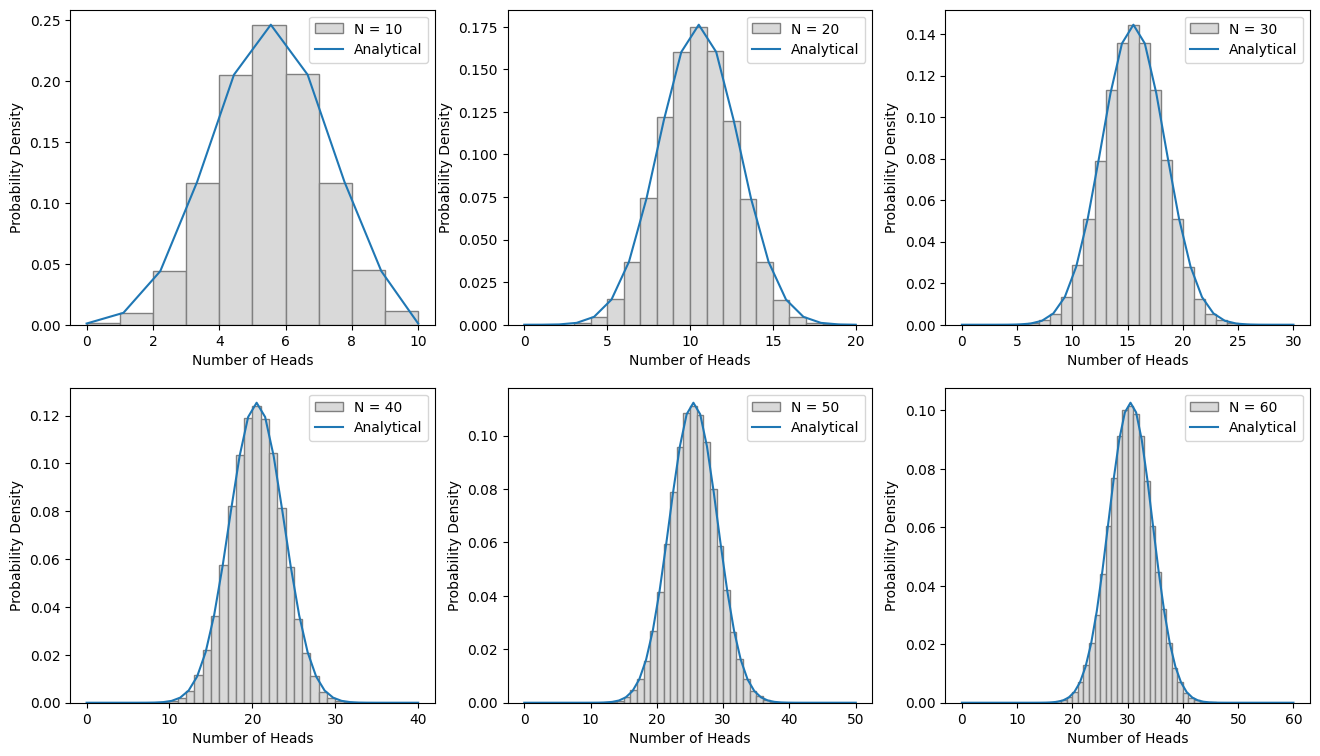

In [18]:
#Number of Ensembles
Num_ensemble = int(10e4)

def Bernouli_Distribution(n: int):

    plt.figure(figsize=(16,9))

    for k in range(1,n+1):
        N = 10*k        #Number of Toss
        #array to store head
        outcome = np.zeros(Num_ensemble, dtype=int)

        for i in range(Num_ensemble):       #Tossing an ensemble of coins
            heads = 0
            for _ in range(N):              #For tossing each coin N times
                if np.random.random()<0.5:  #Tossing of the coin if the random number is <0.5 then head else tails
                    heads +=1
            outcome[i] = heads


        def analytical(N: int)->list:
            '''Theoretical outcome of tossing a coin N times'''
            X = np.linspace(0,N,N)              # X-axis for analytical values
            Y = np.zeros_like(X)                # Analytical Values
            for i in range(len(X)):
                Y[i] = comb(N,int(X[i]))*((1/2)**X[i])*(1/2)**(N-X[i]) 
            return X, Y
        X,Y = analytical(N)


        #Plotting of the Distribution
        if n%3 != 0:
            plots = int(n//3 + 1)
        else: 
            plots = int(n//3)    
        plt.subplot(plots,3,k) 
        plt.ylabel('Probability Density')
        plt.xlabel("Number of Heads")
        plt.hist(outcome,bins=[i for i in range(N+1)], density=True, label='N = {}'.format(N), histtype='bar', color=['0.85'], edgecolor='grey')  
        plt.plot(X,Y, label='Analytical')
        plt.legend(loc='best')
    plt.show() 

Bernouli_Distribution(6)    